In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('gridkit_north_america-highvoltage-vertices.csv')
df2 = pd.read_csv('gridkit_north_america-highvoltage-links.csv')

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16174 entries, 0 to 16173
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   v_id           16174 non-null  int64  
 1   lon            16174 non-null  float64
 2   lat            16174 non-null  float64
 3   typ            16174 non-null  object 
 4   voltage        4427 non-null   object 
 5   frequency      2937 non-null   object 
 6   name           3579 non-null   object 
 7   operator       2579 non-null   object 
 8   ref            655 non-null    object 
 9   wkt_srid_4326  16174 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 1.2+ MB


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22459 entries, 0 to 22458
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   l_id           22459 non-null  int64  
 1   v_id_1         22459 non-null  int64  
 2   v_id_2         22459 non-null  int64  
 3   voltage        12932 non-null  object 
 4   cables         12570 non-null  object 
 5   wires          1870 non-null   object 
 6   frequency      8322 non-null   object 
 7   name           2611 non-null   object 
 8   operator       3370 non-null   object 
 9   ref            1552 non-null   object 
 10  length_m       22459 non-null  float64
 11  r_ohmkm        0 non-null      float64
 12  x_ohmkm        0 non-null      float64
 13  c_nfkm         0 non-null      float64
 14  i_th_max_a     0 non-null      float64
 15  from_relation  0 non-null      float64
 16  wkt_srid_4326  22459 non-null  object 
dtypes: float64(6), int64(3), object(8)
memory usage: 2

In [5]:
# Create the directed graph
G = nx.DiGraph()
for _, row in df2.iterrows():
    G.add_edge(row['v_id_1'], row['v_id_2'])

The graph is weakly connected: False
Number of edges: 20539
Number of nodes: 16167


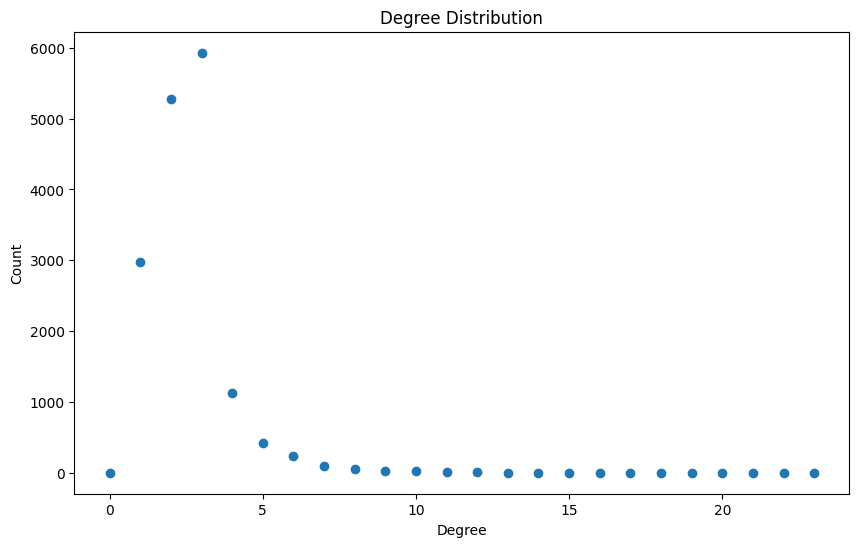

In [6]:
# Check if the graph is weakly connected
is_weakly_connected = nx.is_weakly_connected(G)
print(f"The graph is weakly connected: {is_weakly_connected}")

# Number of edges
num_edges = G.number_of_edges()
print(f"Number of edges: {num_edges}")

# Number of nodes
num_nodes = G.number_of_nodes()
print(f"Number of nodes: {num_nodes}")

# Degree Distribution
degrees = [G.degree(n) for n in G.nodes()]
degree_counts = np.bincount(degrees)
plt.figure(figsize=(10, 6))
plt.plot(degree_counts, 'o')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show()

In [7]:
# Find all weakly connected components
weakly_connected_components = list(nx.weakly_connected_components(G))

# Sort components by size in descending order
sorted_components = sorted(weakly_connected_components, key=len, reverse=True)

# Print the number of components and their sizes
print(f"Total number of weakly connected components: {len(sorted_components)}")
print("Sizes of the components in descending order:")
for i, component in enumerate(sorted_components):
    print(f"Component {i+1}: {len(component)} nodes")

Total number of weakly connected components: 34
Sizes of the components in descending order:
Component 1: 14990 nodes
Component 2: 736 nodes
Component 3: 152 nodes
Component 4: 49 nodes
Component 5: 41 nodes
Component 6: 38 nodes
Component 7: 25 nodes
Component 8: 22 nodes
Component 9: 21 nodes
Component 10: 10 nodes
Component 11: 8 nodes
Component 12: 5 nodes
Component 13: 5 nodes
Component 14: 5 nodes
Component 15: 4 nodes
Component 16: 4 nodes
Component 17: 4 nodes
Component 18: 4 nodes
Component 19: 4 nodes
Component 20: 4 nodes
Component 21: 4 nodes
Component 22: 3 nodes
Component 23: 3 nodes
Component 24: 3 nodes
Component 25: 3 nodes
Component 26: 3 nodes
Component 27: 3 nodes
Component 28: 2 nodes
Component 29: 2 nodes
Component 30: 2 nodes
Component 31: 2 nodes
Component 32: 2 nodes
Component 33: 2 nodes
Component 34: 2 nodes


In [8]:
# Find the largest weakly connected component
largest_component = max(nx.weakly_connected_components(G), key=len)

# Filter df1 to include only nodes that are in the largest component
# Ensure that 'v_id' in df1 is of the same type as nodes in G (e.g., int or str)
df_nodes = df1[df1['v_id'].isin(largest_component)]

# Display the new DataFrame
print(df_nodes)

        v_id        lon        lat          typ       voltage frequency name  \
0      23470 -90.040427  38.738671        joint        345000        60  NaN   
2      25563 -75.159609  40.707010        joint  230000;69000       NaN  NaN   
3       6044 -78.839873  42.789666  sub_station           NaN       NaN  NaN   
4       8477 -94.638969  47.379042   substation           NaN       NaN  NaN   
5      30911 -81.267972  37.702350        joint           NaN       NaN  NaN   
...      ...        ...        ...          ...           ...       ...  ...   
16169   5915 -78.855615  43.000165   substation           NaN       NaN  NaN   
16170  19269 -87.807449  41.637860        joint        345000        60  NaN   
16171  20742 -70.107102  47.916761        joint           NaN       NaN  NaN   
16172  22352 -67.666930  46.548690        joint           NaN       NaN  NaN   
16173  21864 -93.906292  45.386095        joint           NaN       NaN  NaN   

      operator  ref                    

In [9]:
# Reset the index of df_nodes
df_nodes = df_nodes.reset_index(drop=True)

# Display the new DataFrame
print(df_nodes)

        v_id        lon        lat          typ       voltage frequency name  \
0      23470 -90.040427  38.738671        joint        345000        60  NaN   
1      25563 -75.159609  40.707010        joint  230000;69000       NaN  NaN   
2       6044 -78.839873  42.789666  sub_station           NaN       NaN  NaN   
3       8477 -94.638969  47.379042   substation           NaN       NaN  NaN   
4      30911 -81.267972  37.702350        joint           NaN       NaN  NaN   
...      ...        ...        ...          ...           ...       ...  ...   
14985   5915 -78.855615  43.000165   substation           NaN       NaN  NaN   
14986  19269 -87.807449  41.637860        joint        345000        60  NaN   
14987  20742 -70.107102  47.916761        joint           NaN       NaN  NaN   
14988  22352 -67.666930  46.548690        joint           NaN       NaN  NaN   
14989  21864 -93.906292  45.386095        joint           NaN       NaN  NaN   

      operator  ref                    

In [10]:
# Filter df2 to include only edges where both nodes are in the largest component
df_edges = df2[df2['v_id_1'].isin(largest_component) & df2['v_id_2'].isin(largest_component)]

# Reset the index of df_nodes
df_edges = df_edges.reset_index(drop=True)

# Display the new DataFrame
print(df_edges)

        l_id  v_id_1  v_id_2                     voltage cables wires  \
0      10570    5366   18391                         NaN    NaN   NaN   
1      12952   16909   18633                         NaN    NaN   NaN   
2      11669   21844   21845                      345000      3   NaN   
3      12821    6227   22348                         NaN    NaN   NaN   
4      37167   14527   14530                      138000      3   NaN   
...      ...     ...     ...                         ...    ...   ...   
20876  33265   29000    9882                         NaN    NaN   NaN   
20877  32767    9312    9313                      345000      3     2   
20878  18665    9934   24939                         NaN      3   NaN   
20879  28501    4682    4760  138000;69000;138000;138000      6   NaN   
20880   1964    2634   30467                      345000      6   NaN   

      frequency                                               name  \
0           NaN                                      

In [11]:
df_nodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14990 entries, 0 to 14989
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   v_id           14990 non-null  int64  
 1   lon            14990 non-null  float64
 2   lat            14990 non-null  float64
 3   typ            14990 non-null  object 
 4   voltage        4100 non-null   object 
 5   frequency      2675 non-null   object 
 6   name           3411 non-null   object 
 7   operator       2498 non-null   object 
 8   ref            606 non-null    object 
 9   wkt_srid_4326  14990 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 1.1+ MB


In [12]:
df_edges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20881 entries, 0 to 20880
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   l_id           20881 non-null  int64  
 1   v_id_1         20881 non-null  int64  
 2   v_id_2         20881 non-null  int64  
 3   voltage        11860 non-null  object 
 4   cables         11464 non-null  object 
 5   wires          1837 non-null   object 
 6   frequency      7451 non-null   object 
 7   name           2575 non-null   object 
 8   operator       3346 non-null   object 
 9   ref            1543 non-null   object 
 10  length_m       20881 non-null  float64
 11  r_ohmkm        0 non-null      float64
 12  x_ohmkm        0 non-null      float64
 13  c_nfkm         0 non-null      float64
 14  i_th_max_a     0 non-null      float64
 15  from_relation  0 non-null      float64
 16  wkt_srid_4326  20881 non-null  object 
dtypes: float64(6), int64(3), object(8)
memory usage: 2

In [13]:
# Replace 'station' and 'sub_station' with 'substation' in the 'typ' column
df_nodes['typ'] = df_nodes['typ'].replace(['sub_station'], 'substation')

# Verify the changes by counting the unique values again
typ_counts_updated = df_nodes['typ'].value_counts()

# Print the updated counts
print(typ_counts_updated)

typ
substation    6337
joint         5561
station       2101
merge          949
plant           42
Name: count, dtype: int64


In [14]:
# Verify the changes by counting the unique values again
df_nodes['voltage'].value_counts()

voltage
230000                       1524
345000                        645
500000                        163
345000;138000                 120
230000;115000                 113
                             ... 
60000                           1
345000;120000                   1
230000;115000;24000             1
161000;230000;161000            1
345000;69000;345000;69000       1
Name: count, Length: 325, dtype: int64

In [15]:
import pandas as pd
from sklearn.impute import KNNImputer
import numpy as np

# Assuming df_nodes is your DataFrame

# Remove specified columns
df_nodes = df_nodes.drop(columns=['frequency', 'name', 'operator', 'ref', 'wkt_srid_4326'])

# Process the 'voltage' column to keep the maximum single voltage value
def extract_max_voltage(voltage):
    if pd.isna(voltage):
        return np.nan
    # Split the string by comma and convert to float, then return the max value
    return max([float(v) for v in str(voltage).split(';')])

df_nodes['voltage'] = df_nodes['voltage'].apply(extract_max_voltage)

# Display the DataFrame after modifications
print(df_nodes)

        v_id        lon        lat         typ   voltage
0      23470 -90.040427  38.738671       joint  345000.0
1      25563 -75.159609  40.707010       joint  230000.0
2       6044 -78.839873  42.789666  substation       NaN
3       8477 -94.638969  47.379042  substation       NaN
4      30911 -81.267972  37.702350       joint       NaN
...      ...        ...        ...         ...       ...
14985   5915 -78.855615  43.000165  substation       NaN
14986  19269 -87.807449  41.637860       joint  345000.0
14987  20742 -70.107102  47.916761       joint       NaN
14988  22352 -67.666930  46.548690       joint       NaN
14989  21864 -93.906292  45.386095       joint       NaN

[14990 rows x 5 columns]


In [16]:
# Select only numeric columns for imputation
numeric_columns = ['v_id', 'lon', 'lat', 'voltage']  # Update this list based on your DataFrame
df_nodes_numeric = df_nodes[numeric_columns]

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Perform imputation
df_nodes_imputed = imputer.fit_transform(df_nodes_numeric)

# Convert the result back to a DataFrame
df_nodes_imputed = pd.DataFrame(df_nodes_imputed, columns=numeric_columns)

# Display the DataFrame after imputation
print(df_nodes_imputed)

          v_id        lon        lat   voltage
0      23470.0 -90.040427  38.738671  345000.0
1      25563.0 -75.159609  40.707010  230000.0
2       6044.0 -78.839873  42.789666  307000.0
3       8477.0 -94.638969  47.379042  303600.0
4      30911.0 -81.267972  37.702350  353000.0
...        ...        ...        ...       ...
14985   5915.0 -78.855615  43.000165  299000.0
14986  19269.0 -87.807449  41.637860  345000.0
14987  20742.0 -70.107102  47.916761  371000.0
14988  22352.0 -67.666930  46.548690  284000.0
14989  21864.0 -93.906292  45.386095  230000.0

[14990 rows x 4 columns]


In [17]:
# Convert the result back to a DataFrame and include 'v_id'
df_nodes_imputed = pd.DataFrame(df_nodes_imputed, columns=['lon', 'lat', 'voltage'])
df_nodes_imputed['v_id'] = df_nodes_numeric['v_id'].values

# Step 3: Concatenate the imputed 'voltage' with the 'typ' column
df_nodes_final = pd.concat([df_nodes_imputed, df_nodes[['typ']]], axis=1)

# Reset the index of the final DataFrame
df_nodes_final.reset_index(drop=True, inplace=True)

# Reorder the columns to make 'v_id' the first column
df_nodes_final = df_nodes_final[['v_id', 'lon', 'lat', 'voltage', 'typ']]

# Display the rearranged DataFrame
print(df_nodes_final)

        v_id        lon        lat   voltage         typ
0      23470 -90.040427  38.738671  345000.0       joint
1      25563 -75.159609  40.707010  230000.0       joint
2       6044 -78.839873  42.789666  307000.0  substation
3       8477 -94.638969  47.379042  303600.0  substation
4      30911 -81.267972  37.702350  353000.0       joint
...      ...        ...        ...       ...         ...
14985   5915 -78.855615  43.000165  299000.0  substation
14986  19269 -87.807449  41.637860  345000.0       joint
14987  20742 -70.107102  47.916761  371000.0       joint
14988  22352 -67.666930  46.548690  284000.0       joint
14989  21864 -93.906292  45.386095  230000.0       joint

[14990 rows x 5 columns]


In [18]:
df_edges

,l_id,v_id_1,v_id_2,voltage,cables,wires,frequency,name,operator,ref,length_m,r_ohmkm,x_ohmkm,c_nfkm,i_th_max_a,from_relation,wkt_srid_4326
0,10570,5366,18391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31590.935476,NaN,NaN,NaN,NaN,NaN,SRID=4326;LINESTRING(-88.6532774661628 33.6356...
1,12952,16909,18633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3978.620211,NaN,NaN,NaN,NaN,NaN,SRID=4326;LINESTRING(-88.2401665213656 37.1061...
2,11669,21844,21845,345000,3,NaN,NaN,West Medway - West Walpole 345kV transmission ...,NaN,389,46.956051,NaN,NaN,NaN,NaN,NaN,SRID=4326;LINESTRING(-71.2814750000587 42.1297...
3,12821,6227,22348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20368.004721,NaN,NaN,NaN,NaN,NaN,SRID=4326;LINESTRING(-121.160329953608 38.1178...
4,37167,14527,14530,138000,3,NaN,60,NaN,FPL,NaN,5923.089636,NaN,NaN,NaN,NaN,NaN,SRID=4326;LINESTRING(-80.2208421777124 26.3918...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20876,33265,29000,9882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17826.887375,NaN,NaN,NaN,NaN,NaN,SRID=4326;LINESTRING(-79.8000877525794 33.6685...
20877,32767,9312,9313,345000,3,2,60,Guion - Whitestown 345kV,Indianapolis Power & Light,NaN,17584.220246,NaN,NaN,NaN,NaN,NaN,SRID=4326;LINESTRING(-86.3064779735114 39.9824...
20878,18665,9934,24939,NaN,3,NaN,60,NaN,NaN,NaN,3895.577282,NaN,NaN,NaN,NaN,NaN,SRID=4326;LINESTRING(-80.0730114390013 33.0544...
20879,28501,4682,4760,138000;69000;138000;138000,6,NaN,60,NaN,CenterPoint Energy,NaN,1861.273225,NaN,NaN,NaN,NaN,NaN,SRID=4326;LINESTRING(-95.4334394199308 29.7947...


In [19]:
df_edges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20881 entries, 0 to 20880
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   l_id           20881 non-null  int64  
 1   v_id_1         20881 non-null  int64  
 2   v_id_2         20881 non-null  int64  
 3   voltage        11860 non-null  object 
 4   cables         11464 non-null  object 
 5   wires          1837 non-null   object 
 6   frequency      7451 non-null   object 
 7   name           2575 non-null   object 
 8   operator       3346 non-null   object 
 9   ref            1543 non-null   object 
 10  length_m       20881 non-null  float64
 11  r_ohmkm        0 non-null      float64
 12  x_ohmkm        0 non-null      float64
 13  c_nfkm         0 non-null      float64
 14  i_th_max_a     0 non-null      float64
 15  from_relation  0 non-null      float64
 16  wkt_srid_4326  20881 non-null  object 
dtypes: float64(6), int64(3), object(8)
memory usage: 2

In [20]:
# Drop the specified columns
df_edges = df_edges.drop(columns=['name', 'operator', 'ref', 'from_relation', 'wkt_srid_4326'])

# Display the DataFrame after the columns have been removed
df_edges

,l_id,v_id_1,v_id_2,voltage,cables,wires,frequency,length_m,r_ohmkm,x_ohmkm,c_nfkm,i_th_max_a
0,10570,5366,18391,NaN,NaN,NaN,NaN,31590.935476,NaN,NaN,NaN,NaN
1,12952,16909,18633,NaN,NaN,NaN,NaN,3978.620211,NaN,NaN,NaN,NaN
2,11669,21844,21845,345000,3,NaN,NaN,46.956051,NaN,NaN,NaN,NaN
3,12821,6227,22348,NaN,NaN,NaN,NaN,20368.004721,NaN,NaN,NaN,NaN
4,37167,14527,14530,138000,3,NaN,60,5923.089636,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
20876,33265,29000,9882,NaN,NaN,NaN,NaN,17826.887375,NaN,NaN,NaN,NaN
20877,32767,9312,9313,345000,3,2,60,17584.220246,NaN,NaN,NaN,NaN
20878,18665,9934,24939,NaN,3,NaN,60,3895.577282,NaN,NaN,NaN,NaN
20879,28501,4682,4760,138000;69000;138000;138000,6,NaN,60,1861.273225,NaN,NaN,NaN,NaN


In [21]:
df_edges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20881 entries, 0 to 20880
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   l_id        20881 non-null  int64  
 1   v_id_1      20881 non-null  int64  
 2   v_id_2      20881 non-null  int64  
 3   voltage     11860 non-null  object 
 4   cables      11464 non-null  object 
 5   wires       1837 non-null   object 
 6   frequency   7451 non-null   object 
 7   length_m    20881 non-null  float64
 8   r_ohmkm     0 non-null      float64
 9   x_ohmkm     0 non-null      float64
 10  c_nfkm      0 non-null      float64
 11  i_th_max_a  0 non-null      float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.9+ MB


In [22]:

# Step 1: Process the 'voltage' column to keep the maximum value
def extract_max_voltage(voltage):
    if pd.isna(voltage):
        return np.nan
    return max([float(v) for v in str(voltage).split(';')], default=np.nan)

df_edges['voltage'] = df_edges['voltage'].apply(extract_max_voltage)

# Step 2: Convert 'voltage', 'cables', 'wires', and 'frequency' to numeric
for column in ['voltage', 'cables', 'wires', 'frequency']:
    df_edges[column] = pd.to_numeric(df_edges[column], errors='coerce')

# Step 3: Apply KNN imputation
imputer = KNNImputer(n_neighbors=5)
df_edges[['voltage', 'cables', 'wires', 'frequency']] = imputer.fit_transform(df_edges[['voltage', 'cables', 'wires', 'frequency']])

# Step 4: Round the imputed values to the nearest integer
for column in ['voltage', 'cables', 'wires', 'frequency']:
    df_edges[column] = df_edges[column].round().astype(int)

# Display the DataFrame after imputation
df_edges

,l_id,v_id_1,v_id_2,voltage,cables,wires,frequency,length_m,r_ohmkm,x_ohmkm,c_nfkm,i_th_max_a
0,10570,5366,18391,282437,4,1,60,31590.935476,NaN,NaN,NaN,NaN
1,12952,16909,18633,282437,4,1,60,3978.620211,NaN,NaN,NaN,NaN
2,11669,21844,21845,345000,3,2,60,46.956051,NaN,NaN,NaN,NaN
3,12821,6227,22348,282437,4,1,60,20368.004721,NaN,NaN,NaN,NaN
4,37167,14527,14530,138000,3,1,60,5923.089636,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
20876,33265,29000,9882,282437,4,1,60,17826.887375,NaN,NaN,NaN,NaN
20877,32767,9312,9313,345000,3,2,60,17584.220246,NaN,NaN,NaN,NaN
20878,18665,9934,24939,234600,3,2,60,3895.577282,NaN,NaN,NaN,NaN
20879,28501,4682,4760,138000,6,1,60,1861.273225,NaN,NaN,NaN,NaN


In [23]:
df_edges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20881 entries, 0 to 20880
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   l_id        20881 non-null  int64  
 1   v_id_1      20881 non-null  int64  
 2   v_id_2      20881 non-null  int64  
 3   voltage     20881 non-null  int32  
 4   cables      20881 non-null  int32  
 5   wires       20881 non-null  int32  
 6   frequency   20881 non-null  int32  
 7   length_m    20881 non-null  float64
 8   r_ohmkm     0 non-null      float64
 9   x_ohmkm     0 non-null      float64
 10  c_nfkm      0 non-null      float64
 11  i_th_max_a  0 non-null      float64
dtypes: float64(5), int32(4), int64(3)
memory usage: 1.6 MB


In [24]:
df_edges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20881 entries, 0 to 20880
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   l_id        20881 non-null  int64  
 1   v_id_1      20881 non-null  int64  
 2   v_id_2      20881 non-null  int64  
 3   voltage     20881 non-null  int32  
 4   cables      20881 non-null  int32  
 5   wires       20881 non-null  int32  
 6   frequency   20881 non-null  int32  
 7   length_m    20881 non-null  float64
 8   r_ohmkm     0 non-null      float64
 9   x_ohmkm     0 non-null      float64
 10  c_nfkm      0 non-null      float64
 11  i_th_max_a  0 non-null      float64
dtypes: float64(5), int32(4), int64(3)
memory usage: 1.6 MB


In [25]:
df3 = pd.read_csv('edges3.csv')

In [26]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   l_id      765 non-null    float64
 1   v_id_1    765 non-null    float64
 2   v_id_2    765 non-null    float64
 3   voltage   765 non-null    float64
 4   cables    765 non-null    float64
 5   wires     765 non-null    float64
 6   length_m  765 non-null    float64
 7   r         765 non-null    float64
 8   x         765 non-null    float64
 9   c         765 non-null    float64
 10  i_th_max  765 non-null    float64
dtypes: float64(11)
memory usage: 65.9 KB


In [27]:
#Using regression model to impute r, x, c, i
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming df3 is your DataFrame

# Exclude 'l_id', 'v_id_1', and 'v_id_2' from the features
X = df3.drop(columns=['l_id', 'v_id_1', 'v_id_2', 'r', 'x', 'c', 'i_th_max'])

# Targets remain the same
y_r = df3['r']
y_x = df3['x']
y_c = df3['c']
y_i_th_max = df3['i_th_max']


# Train a model for 'r'
X_train, X_test, y_train_r, y_test_r = train_test_split(X, y_r, test_size=0.2, random_state=42)
model_r = LinearRegression()
model_r.fit(X_train, y_train_r)
y_pred_r = model_r.predict(X_test)
print("RMSE for r:", mean_squared_error(y_test_r, y_pred_r, squared=False))

# Train a model for 'x'
y_train_x, y_test_x = train_test_split(y_x, test_size=0.2, random_state=42)
model_x = LinearRegression()
model_x.fit(X_train, y_train_x)
y_pred_x = model_x.predict(X_test)
print("RMSE for x:", mean_squared_error(y_test_x, y_pred_x, squared=False))

# Train a model for 'c'
y_train_c, y_test_c = train_test_split(y_c, test_size=0.2, random_state=42)
model_c = LinearRegression()
model_c.fit(X_train, y_train_c)
y_pred_c = model_c.predict(X_test)
print("RMSE for c:", mean_squared_error(y_test_c, y_pred_c, squared=False))

# Train a model for 'i_th_max'
y_train_i_th_max, y_test_i_th_max = train_test_split(y_i_th_max, test_size=0.2, random_state=42)
model_i_th_max = LinearRegression()
model_i_th_max.fit(X_train, y_train_i_th_max)
y_pred_i_th_max = model_i_th_max.predict(X_test)
print("RMSE for i_th_max:", mean_squared_error(y_test_i_th_max, y_pred_i_th_max, squared=False))

# Assuming that df_edges has the same feature columns as df3

# Predict and impute values in df_edges
df_edges['r_ohmkm'] = model_r.predict(df_edges[['voltage', 'cables', 'wires', 'length_m']])
df_edges['x_ohmkm'] = model_x.predict(df_edges[[ 'voltage', 'cables', 'wires', 'length_m']])
df_edges['c_nfkm'] = model_c.predict(df_edges[['voltage', 'cables', 'wires', 'length_m']])
df_edges['i_th_max_a'] = model_i_th_max.predict(df_edges[['voltage', 'cables', 'wires', 'length_m']])

RMSE for r: 0.9942414090180147
RMSE for x: 1.401688893963128
RMSE for c: 45.518844043211246
RMSE for i_th_max: 199.32220849133788


In [28]:
df_edges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20881 entries, 0 to 20880
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   l_id        20881 non-null  int64  
 1   v_id_1      20881 non-null  int64  
 2   v_id_2      20881 non-null  int64  
 3   voltage     20881 non-null  int32  
 4   cables      20881 non-null  int32  
 5   wires       20881 non-null  int32  
 6   frequency   20881 non-null  int32  
 7   length_m    20881 non-null  float64
 8   r_ohmkm     20881 non-null  float64
 9   x_ohmkm     20881 non-null  float64
 10  c_nfkm      20881 non-null  float64
 11  i_th_max_a  20881 non-null  float64
dtypes: float64(5), int32(4), int64(3)
memory usage: 1.6 MB


In [29]:
# Remove the 'frequency' column
df_edges = df_edges.drop(columns=['frequency'])

# Display the DataFrame after the column has been removed
df_edges

,l_id,v_id_1,v_id_2,voltage,cables,wires,length_m,r_ohmkm,x_ohmkm,c_nfkm,i_th_max_a
0,10570,5366,18391,282437,4,1,31590.935476,1.393431,8.746086,396.868589,94.424304
1,12952,16909,18633,282437,4,1,3978.620211,0.881075,1.385756,45.387716,-104.032466
2,11669,21844,21845,345000,3,2,46.956051,0.249000,-0.524943,24.353724,-41.153665
3,12821,6227,22348,282437,4,1,20368.004721,1.185186,5.754505,254.010395,13.762231
4,37167,14527,14530,138000,3,1,5923.089636,1.599152,4.313140,2.557417,-243.033312
...,...,...,...,...,...,...,...,...,...,...,...
20876,33265,29000,9882,282437,4,1,17826.887375,1.138035,5.077146,221.664170,-4.501429
20877,32767,9312,9313,345000,3,2,17584.220246,0.574410,4.149784,247.587917,84.891136
20878,18665,9934,24939,234600,3,2,3895.577282,0.793252,2.334607,21.596829,-101.931890
20879,28501,4682,4760,138000,6,1,1861.273225,1.333651,3.200200,-49.501696,-160.414735


In [30]:
df3

,l_id,v_id_1,v_id_2,voltage,cables,wires,length_m,r,x,c,i_th_max
0,1.0,1.0,2.0,220000.0,3.0,2.0,43379.0,1.735160,13.881280,498.8585,112.78540
1,2.0,3.0,4.0,380000.0,6.0,4.0,72686.0,0.227144,18.171500,995.7982,1511.86880
2,3.0,5.0,6.0,220000.0,6.0,2.0,33943.0,0.678860,10.861760,390.3445,176.50360
3,4.0,7.0,5.0,380000.0,3.0,4.0,33471.0,0.209194,8.367750,458.5527,348.09840
4,5.0,8.0,9.0,380000.0,6.0,4.0,28163.0,0.088009,7.040750,385.8331,585.79040
...,...,...,...,...,...,...,...,...,...,...,...
760,761.0,474.0,476.0,220000.0,9.0,1.8,770.0,0.038376,0.253184,9.0988,2.10912
761,762.0,475.0,476.0,220000.0,9.0,2.4,661.0,0.020584,0.196608,7.0656,2.11640
762,763.0,477.0,479.0,220000.0,12.0,2.0,3315.0,0.126104,1.008832,36.2549,8.19676
763,764.0,225.0,479.0,220000.0,12.0,2.0,897.0,0.033360,0.289088,10.3891,2.70972


Defaulting to user installation because normal site-packages is not writeable


# Network Generation and Calculate the centralities

In [31]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_nodes_final and df_edges are already loaded

# Create the graph
G = nx.DiGraph()
for _, row in df_edges.iterrows():
    G.add_edge(row['v_id_1'], row['v_id_2'], weight=row['voltage'])

# Calculate centralities
degree_centrality = nx.degree_centrality(G)
pagerank = nx.pagerank(G, weight='weight')
betweenness = nx.betweenness_centrality(G, weight='weight')

# Add centralities to df_nodes_final
df_nodes_final['degree_centrality'] = df_nodes_final['v_id'].map(degree_centrality)
df_nodes_final['pagerank'] = df_nodes_final['v_id'].map(pagerank)
df_nodes_final['betweenness'] = df_nodes_final['v_id'].map(betweenness)

# Function to calculate entropy weight
def entropy_weight(centrality):
    proportion = centrality / centrality.sum()
    e = -np.sum(proportion * np.log(proportion + np.finfo(float).eps)) / np.log(len(centrality))
    return e

# Calculate entropy for each centrality measure
E_degree = entropy_weight(df_nodes_final['degree_centrality'])
E_pagerank = entropy_weight(df_nodes_final['pagerank'])
E_betweenness = entropy_weight(df_nodes_final['betweenness'])

# Calculate weights
total_entropy = E_degree + E_pagerank + E_betweenness
w1 = (1 - E_degree) / (3 - total_entropy)
w2 = (1 - E_pagerank) / (3 - total_entropy)
w3 = (1 - E_betweenness) / (3 - total_entropy)

# Calculate combined centrality and add it as a new column
df_nodes_final['combined_centrality'] = (w1 * df_nodes_final['degree_centrality'] + 
                                         w2 * df_nodes_final['pagerank'] + 
                                         w3 * df_nodes_final['betweenness'])

# Criticality analysis
min_value = df_nodes_final['combined_centrality'].min()
max_value = df_nodes_final['combined_centrality'].max()
quantiles = df_nodes_final['combined_centrality'].quantile([0.25, 0.5, 0.75])

# Define the bin edges based on the quantiles
bins = [min_value, quantiles[0.25], quantiles[0.5], quantiles[0.75], max_value]

# Define the labels
labels = ['Low', 'Moderate', 'High', 'Severe']

# Create the new column 'criticality_label'
df_nodes_final['criticality_label'] = pd.cut(df_nodes_final['combined_centrality'], bins=bins, labels=labels, include_lowest=True)

# Print results
print(f"Minimum Combined Centrality: {min_value}")
print(f"Maximum Combined Centrality: {max_value}")
print("Quantiles:")
print(quantiles)


Minimum Combined Centrality: 4.838098183871021e-06
Maximum Combined Centrality: 8.009619011622504e-05
Quantiles:
0.25    0.000007
0.50    0.000011
0.75    0.000014
Name: combined_centrality, dtype: float64


In [32]:
# Network Visualization
pos = nx.spring_layout(G, weight='weight')  # Using a different layout
plt.figure(figsize=(40, 40))  # Adjust figure size as needed

nx.draw_networkx_nodes(G, pos, node_size=[v * 8000 for v in degree_centrality.values()], node_color='skyblue')
nx.draw_networkx_edges(G, pos, alpha=0.5, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title("Network Visualization")
plt.show()

# View the first few rows of df_nodes_final to confirm the new columns
print(df_nodes_final.head())

KeyboardInterrupt: 

In [34]:
df_nodes_final

,v_id,lon,lat,voltage,typ,degree_centrality,pagerank,betweenness,combined_centrality,criticality_label
0,23470,-90.040427,38.738671,345000.0,joint,0.000200,0.000175,0.000000e+00,0.000021,Severe
1,25563,-75.159609,40.707010,230000.0,joint,0.000200,0.000064,4.451267e-09,0.000013,High
2,6044,-78.839873,42.789666,307000.0,substation,0.000200,0.000030,0.000000e+00,0.000010,Moderate
3,8477,-94.638969,47.379042,303600.0,substation,0.000133,0.000030,0.000000e+00,0.000007,Low
4,30911,-81.267972,37.702350,353000.0,joint,0.000133,0.000068,0.000000e+00,0.000010,Moderate
...,...,...,...,...,...,...,...,...,...,...
14985,5915,-78.855615,43.000165,299000.0,substation,0.000534,0.000069,2.047583e-07,0.000026,Severe
14986,19269,-87.807449,41.637860,345000.0,joint,0.000200,0.000178,0.000000e+00,0.000021,Severe
14987,20742,-70.107102,47.916761,371000.0,joint,0.000200,0.000080,7.567154e-08,0.000014,High
14988,22352,-67.666930,46.548690,284000.0,joint,0.000200,0.000063,1.780507e-07,0.000013,High


In [33]:

# Assuming df_nodes_final is your DataFrame and G is your network graph

# Calculate additional centralities
eigen_centrality = nx.eigenvector_centrality(G, max_iter=1000, weight='weight')
closeness_centrality = nx.closeness_centrality(G)
clustering_coefficient = nx.clustering(G)
load_centrality = nx.load_centrality(G)

# Initialize dictionaries to store additional measures
avg_shortest_path_length = {}
average_neighbor_degree = nx.average_neighbor_degree(G)
node_strength = {node: 0 for node in G.nodes()}

# Calculate the average shortest path length and node strength for each node
for node in G.nodes():
    path_lengths = nx.single_source_shortest_path_length(G, node)
    avg_length = sum(path_lengths.values()) / len(path_lengths)
    avg_shortest_path_length[node] = avg_length
    # Sum weights of edges for node strength
    node_strength[node] += sum(data['weight'] for _, _, data in G.edges(node, data=True))
    if isinstance(G, nx.DiGraph):
        node_strength[node] += sum(data['weight'] for _, _, data in G.in_edges(node, data=True))

# Add the new centrality measures to df_nodes_final
df_nodes_final['eigen_centrality'] = df_nodes_final['v_id'].apply(lambda x: eigen_centrality.get(x, 0))
df_nodes_final['closeness_centrality'] = df_nodes_final['v_id'].apply(lambda x: closeness_centrality.get(x, 0))
df_nodes_final['clustering_coefficient'] = df_nodes_final['v_id'].apply(lambda x: clustering_coefficient.get(x, 0))
df_nodes_final['load_centrality'] = df_nodes_final['v_id'].apply(lambda x: load_centrality.get(x, 0))
df_nodes_final['avg_shortest_path_length'] = df_nodes_final['v_id'].apply(lambda x: avg_shortest_path_length.get(x, float('inf')))
df_nodes_final['average_neighbor_degree'] = df_nodes_final['v_id'].apply(lambda x: average_neighbor_degree.get(x, 0))
df_nodes_final['node_strength'] = df_nodes_final['v_id'].apply(lambda x: node_strength.get(x, 0))

# Display the DataFrame with the new columns
df_nodes_final

,v_id,lon,lat,voltage,typ,degree_centrality,pagerank,betweenness,combined_centrality,criticality_label,eigen_centrality,closeness_centrality,clustering_coefficient,load_centrality,avg_shortest_path_length,average_neighbor_degree,node_strength
0,23470,-90.040427,38.738671,345000.0,joint,0.000200,0.000175,0.000000e+00,0.000021,Severe,3.087410e-230,0.000291,0.166667,0.000000e+00,0.000000,0.000000,1035000.0
1,25563,-75.159609,40.707010,230000.0,joint,0.000200,0.000064,4.451267e-09,0.000013,High,9.001134e-276,0.000133,0.166667,4.451267e-09,0.500000,0.000000,529000.0
2,6044,-78.839873,42.789666,307000.0,substation,0.000200,0.000030,0.000000e+00,0.000010,Moderate,4.076601e-283,0.000000,0.000000,0.000000e+00,2.000000,1.333333,847311.0
3,8477,-94.638969,47.379042,303600.0,substation,0.000133,0.000030,0.000000e+00,0.000007,Low,4.076601e-283,0.000000,0.000000,0.000000e+00,4.391304,2.000000,460000.0
4,30911,-81.267972,37.702350,353000.0,joint,0.000133,0.000068,0.000000e+00,0.000010,Moderate,1.105328e-275,0.000133,0.000000,0.000000e+00,0.000000,0.000000,564874.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14985,5915,-78.855615,43.000165,299000.0,substation,0.000534,0.000069,2.047583e-07,0.000026,Severe,1.657991e-275,0.000200,0.000000,2.136608e-07,1.833333,1.800000,2207059.0
14986,19269,-87.807449,41.637860,345000.0,joint,0.000200,0.000178,0.000000e+00,0.000021,Severe,1.545621e-16,0.000300,0.166667,0.000000e+00,0.000000,0.000000,1035000.0
14987,20742,-70.107102,47.916761,371000.0,joint,0.000200,0.000080,7.567154e-08,0.000014,High,1.766668e-16,0.000152,0.166667,7.567154e-08,2.222222,1.000000,847311.0
14988,22352,-67.666930,46.548690,284000.0,joint,0.000200,0.000063,1.780507e-07,0.000013,High,9.158024e-256,0.000128,0.000000,1.780507e-07,2.400000,1.500000,847311.0


# Classical Machine Learning


In [2]:
#If you don't want to run the network generation code again and prediction of features run from below. 
import pandas as pd
df_nodes_final = pd.read_csv('final_data.csv')

In [3]:
columns_to_keep = ['v_id', 'lon', 'lat', 'voltage', 'typ', 'eigen_centrality', 
                   'closeness_centrality', 'clustering_coefficient', 'load_centrality', 
                   'avg_shortest_path_length', 'average_neighbor_degree', 'node_strength', 'criticality_label']

df_clm = df_nodes_final[columns_to_keep]

# Display the new DataFrame
df_clm

,v_id,lon,lat,voltage,typ,eigen_centrality,closeness_centrality,clustering_coefficient,load_centrality,avg_shortest_path_length,average_neighbor_degree,node_strength,criticality_label
0,23470,-90.040427,38.738671,345000.0,joint,3.087410e-230,0.000291,0.166667,0.000000e+00,0.000000,0.000000,1035000.0,Severe
1,25563,-75.159609,40.707010,230000.0,joint,9.001134e-276,0.000133,0.166667,4.451267e-09,0.500000,0.000000,529000.0,High
2,6044,-78.839873,42.789666,307000.0,substation,4.076601e-283,0.000000,0.000000,0.000000e+00,2.000000,1.333333,847311.0,Moderate
3,8477,-94.638969,47.379042,303600.0,substation,4.076601e-283,0.000000,0.000000,0.000000e+00,4.391304,2.000000,460000.0,Low
4,30911,-81.267972,37.702350,353000.0,joint,1.105328e-275,0.000133,0.000000,0.000000e+00,0.000000,0.000000,564874.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14985,5915,-78.855615,43.000165,299000.0,substation,1.657991e-275,0.000200,0.000000,2.136608e-07,1.833333,1.800000,2207059.0,Severe
14986,19269,-87.807449,41.637860,345000.0,joint,1.545621e-16,0.000300,0.166667,0.000000e+00,0.000000,0.000000,1035000.0,Severe
14987,20742,-70.107102,47.916761,371000.0,joint,1.766668e-16,0.000152,0.166667,7.567154e-08,2.222222,1.000000,847311.0,High
14988,22352,-67.666930,46.548690,284000.0,joint,9.158024e-256,0.000128,0.000000,1.780507e-07,2.400000,1.500000,847311.0,High


In [4]:
# One hot encoding for type column
from sklearn.preprocessing import OneHotEncoder

# Reshape the 'typ' column to a 2D array for OneHotEncoder
typ_array = df_clm[['typ']].values

# Create the encoder
encoder = OneHotEncoder(sparse=False)
typ_encoded = encoder.fit_transform(typ_array)

# Convert the encoded data into a DataFrame
typ_encoded_df = pd.DataFrame(typ_encoded, columns=encoder.get_feature_names_out(['typ']))

# Concatenate the encoded df with the original df
df_clm = pd.concat([df_clm.reset_index(drop=True), typ_encoded_df], axis=1)

# Drop the original 'typ' column
df_clm.drop('typ', axis=1, inplace=True)

C:\Users\Ayman Sajjad Akash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_clm['criticality_label'] = label_encoder.fit_transform(df_clm['criticality_label'])

In [6]:
from sklearn.preprocessing import StandardScaler

# List of numerical columns (exclude 'v_id' and 'criticality_label')
num_cols = ['lon', 'lat', 'voltage', 'eigen_centrality', 'closeness_centrality', 
            'clustering_coefficient', 'load_centrality', 'avg_shortest_path_length', 
            'average_neighbor_degree', 'node_strength']

scaler = StandardScaler()
df_clm[num_cols] = scaler.fit_transform(df_clm[num_cols])

In [7]:
# Splitting Data
from sklearn.model_selection import train_test_split

X = df_clm.drop('criticality_label', axis=1)
y = df_clm['criticality_label']

# Stratified split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# XGBoost & MLP & SVM

In [7]:
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import time

star_time = time.time()

# XGBoost Classifier
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)

# Multilayer Perceptron Classifier
mlp_clf = MLPClassifier(max_iter=1000, random_state=42)
mlp_clf.fit(X_train, y_train)

# SVM Classifier
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

# Evaluate initial models
y_pred_xgb = xgb_clf.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")
xgboost_time = time.time()
print(xgboost_time-star_time)

y_pred_mlp = mlp_clf.predict(X_test)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"MLP Accuracy: {accuracy_mlp}")
mlp_time = time.time()
print(mlp_time-xgboost_time)

y_pred_svm = svm_clf.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm}")
svm_time = time.time()
print(svm_time-mlp_time)

XGBoost Accuracy: 0.8274405158994885
10.162554264068604
MLP Accuracy: 0.4525239048254392
0.01300048828125
SVM Accuracy: 0.4004892150322437
6.327788352966309


# Feature Importance for XG Boost

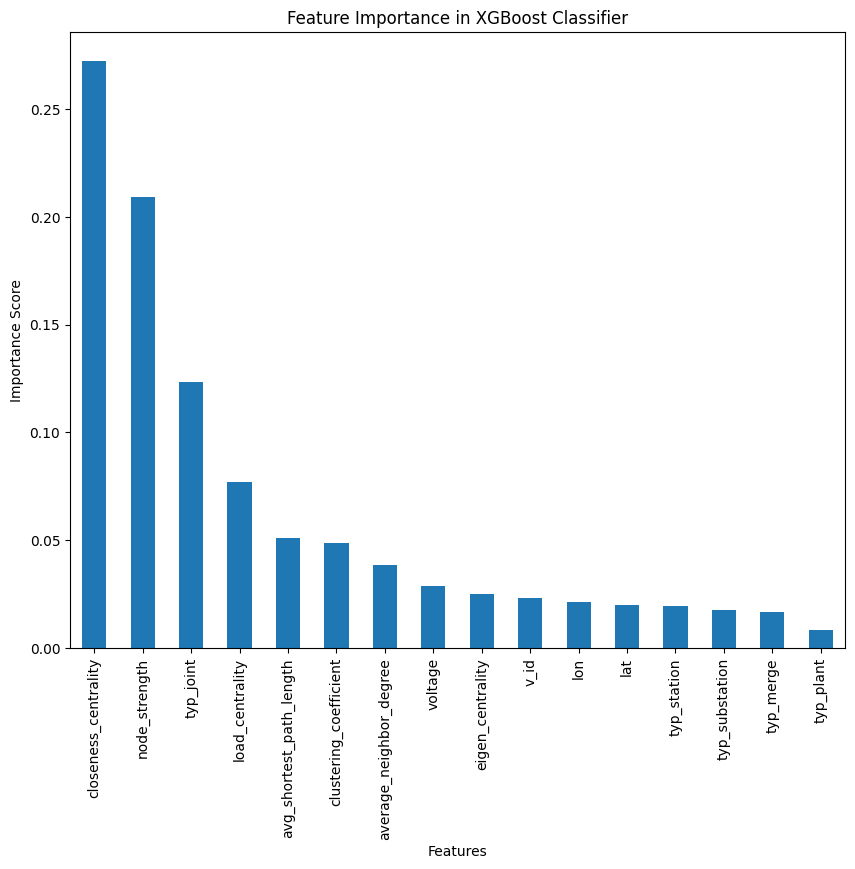

In [8]:
#Assess Feature Importance with XGBoost

import matplotlib.pyplot as plt

# Get feature importances from the trained XGBoost model
xgb_feature_importances = xgb_clf.feature_importances_

# Create a pandas series to hold the feature importances
features = pd.Series(xgb_feature_importances, index=X_train.columns)

# Plot the feature importances
plt.figure(figsize=(10, 8))
features.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance in XGBoost Classifier')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()

In [10]:
# Assuming X_train is a pandas DataFrame with column names
feature_importances = xgb_clf.feature_importances_
feature_names = X_train.columns
importances = pd.Series(feature_importances, index=feature_names).sort_values(ascending=False)

print("Feature Importances:")
print(importances)

Feature Importances:
closeness_centrality        0.272086
node_strength               0.209383
typ_joint                   0.123366
load_centrality             0.077030
avg_shortest_path_length    0.050867
clustering_coefficient      0.048543
average_neighbor_degree     0.038696
voltage                     0.028559
eigen_centrality            0.025048
v_id                        0.023290
lon                         0.021096
lat                         0.019916
typ_station                 0.019335
typ_substation              0.017479
typ_merge                   0.016885
typ_plant                   0.008419
dtype: float32


In [8]:
#Cross Validation
from sklearn.model_selection import GridSearchCV

# XGboost GridSearch

In [13]:
import torch

if torch.cuda.is_available():
    print(f"GPU is available: {torch.cuda.get_device_name(0)}")
else:
    print("GPU is not available")

GPU is available: Quadro P600


In [9]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7,0.8,0.9],
    'device': ['cuda']
}

# XGBoost Grid Search
xgb_grid_search = GridSearchCV(XGBClassifier(),
                            param_grid=xgb_param_grid,
                            cv=5,
                            scoring='accuracy',
                            n_jobs=-1,
                            verbose=10,
                            error_score='raise')
                                
xgb_grid_search.fit(X_train, y_train)

# Evaluate best XGBoost model
best_xgb = xgb_grid_search.best_estimator_
best_xgb_accuracy = accuracy_score(y_test, best_xgb.predict(X_test))
print(f"Best XGBoost Accuracy: {best_xgb_accuracy}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best XGBoost Accuracy: 0.831443184345119


C:\Users\Ayman Sajjad Akash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:160: UserWarning: [23:20:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


# Result 
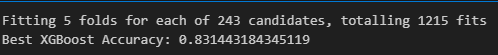

# MLP GridSearch

In [13]:
from sklearn.neural_network import MLPClassifier
mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive']
}

# MLP Grid Search
mlp_grid_search = GridSearchCV(MLPClassifier(max_iter=1000),
                               mlp_param_grid,
                               cv=5,
                               scoring='accuracy',
                               n_jobs=-1)
mlp_grid_search.fit(X_train, y_train)

# Evaluate best MLP model
best_mlp = mlp_grid_search.best_estimator_
best_mlp_accuracy = accuracy_score(y_test, best_mlp.predict(X_test))
print(f"Best MLP Accuracy: {best_mlp_accuracy}")

Best MLP Accuracy: 0.4178341116299755


# SVM GridSearch

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

svm_param_grid = {
    'C': [1, 10],
    'gamma': [0.01, 0.1],
    'kernel': ['rbf']
}
# SVM Grid Search
svm_grid_search = GridSearchCV(SVC(), svm_param_grid, 
                                        cv=5, 
                                        scoring='accuracy', 
                                        n_jobs=-1)
svm_grid_search.fit(X_train, y_train)

# Evaluate best SVM model
best_svm = svm_grid_search.best_estimator_
best_svm_accuracy = accuracy_score(y_test, best_svm.predict(X_test))
print(f"Best SVM Accuracy: {best_svm_accuracy}")

Best SVM Accuracy: 0.3875917278185457


# Result 
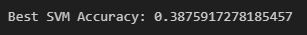

In [ ]:
# Best parameters and accuracy for XGBoost
best_xgb_params = xgb_grid_search.best_params_
best_xgb_accuracy = accuracy_score(y_test, best_xgb.predict(X_test))
print(f"Best XGBoost Parameters: {best_xgb_params}")
print(f"Best XGBoost Accuracy: {best_xgb_accuracy}")

# Best parameters and accuracy for MLP
best_mlp_params = mlp_grid_search.best_params_
best_mlp_accuracy = accuracy_score(y_test, best_mlp.predict(X_test))
print(f"Best MLP Parameters: {best_mlp_params}")
print(f"Best MLP Accuracy: {best_mlp_accuracy}")

# Best parameters and accuracy for SVM
best_svm_params = svm_grid_search.best_params_
best_svm_accuracy = accuracy_score(y_test, best_svm.predict(X_test))
print(f"Best SVM Parameters: {best_svm_params}")
print(f"Best SVM Accuracy: {best_svm_accuracy}")

# GNN Application

In [40]:
# Select the columns to keep and reorder them, placing 'criticality_label' at the end
columns_to_keep = ['v_id', 'lon', 'lat', 'voltage', 'typ', 
                   'eigen_centrality', 'closeness_centrality', 
                   'clustering_coefficient', 'load_centrality', 
                   'avg_shortest_path_length', 'average_neighbor_degree', 
                   'node_strength', 'criticality_label']

df_nodes_gnn = df_nodes_final[columns_to_keep]

# Display the new DataFrame
df_nodes_gnn


,v_id,lon,lat,voltage,typ,eigen_centrality,closeness_centrality,clustering_coefficient,load_centrality,avg_shortest_path_length,average_neighbor_degree,node_strength,criticality_label
0,23470,-90.040427,38.738671,345000.0,joint,3.087410e-230,0.000291,0.166667,0.000000e+00,0.000000,0.000000,1035000.0,Severe
1,25563,-75.159609,40.707010,230000.0,joint,9.001134e-276,0.000133,0.166667,4.451267e-09,0.500000,0.000000,529000.0,High
2,6044,-78.839873,42.789666,307000.0,substation,4.076601e-283,0.000000,0.000000,0.000000e+00,2.000000,1.333333,847311.0,Moderate
3,8477,-94.638969,47.379042,303600.0,substation,4.076601e-283,0.000000,0.000000,0.000000e+00,4.391304,2.000000,460000.0,Low
4,30911,-81.267972,37.702350,353000.0,joint,1.105328e-275,0.000133,0.000000,0.000000e+00,0.000000,0.000000,564874.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14985,5915,-78.855615,43.000165,299000.0,substation,1.657991e-275,0.000200,0.000000,2.136608e-07,1.833333,1.800000,2207059.0,Severe
14986,19269,-87.807449,41.637860,345000.0,joint,1.545621e-16,0.000300,0.166667,0.000000e+00,0.000000,0.000000,1035000.0,Severe
14987,20742,-70.107102,47.916761,371000.0,joint,1.766668e-16,0.000152,0.166667,7.567154e-08,2.222222,1.000000,847311.0,High
14988,22352,-67.666930,46.548690,284000.0,joint,9.158024e-256,0.000128,0.000000,1.780507e-07,2.400000,1.500000,847311.0,High


In [ ]:
df_edges

In [41]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming df_nodes_gnn is your DataFrame with the 'typ' column

# One-hot encode the 'typ' column in df_nodes_gnn
encoder = OneHotEncoder(sparse=False)
typ_encoded = encoder.fit_transform(df_nodes_gnn[['typ']])

# Convert the encoded data into a DataFrame
typ_encoded_df = pd.DataFrame(typ_encoded, columns=encoder.get_feature_names_out(['typ']))

# Concatenate the encoded DataFrame with df_nodes_gnn, dropping the original 'typ' column
df_nodes_gnn = pd.concat([df_nodes_gnn.drop('typ', axis=1), typ_encoded_df], axis=1)

C:\Users\Ayman Sajjad Akash\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [42]:
from sklearn.preprocessing import StandardScaler

# Standardize node features in df_nodes_gnn
node_feature_cols = [col for col in df_nodes_gnn.columns if col not in ['v_id', 'criticality_label', *encoder.get_feature_names_out(['typ'])]]
scaler = StandardScaler()
df_nodes_gnn[node_feature_cols] = scaler.fit_transform(df_nodes_gnn[node_feature_cols])

# Assuming df_edges is your DataFrame with edge features

# List of numerical edge feature columns in df_edges
edge_feature_cols = ['voltage', 'cables', 'wires', 'length_m', 'r_ohmkm', 'x_ohmkm', 'c_nfkm', 'i_th_max_a']
df_edges[edge_feature_cols] = scaler.fit_transform(df_edges[edge_feature_cols])

In [ ]:
pip install torch torchvision torchaudio -f https://download.pytorch.org/whl/torch_stable.html


In [ ]:
!pip install torch-geometric


In [43]:
import torch
from torch_geometric.data import Data
from sklearn.preprocessing import LabelEncoder

# Prepare node features for df_nodes_gnn
# Assuming 'df_nodes_gnn' has the required node features and 'df_edges' has the edge information
node_features = df_nodes_gnn.drop(['v_id', 'criticality_label'], axis=1).values
data_x = torch.tensor(node_features, dtype=torch.float)

# Prepare edge index for df_edges
# Assuming 'v_id_1' and 'v_id_2' are columns in 'df_edges' representing the edges
# Subtract 1 from each node index if your node indices start from 1 (to convert to 0-based indexing used in PyTorch Geometric)
edge_index = torch.tensor(df_edges[['v_id_1', 'v_id_2']].values, dtype=torch.long) - 1
edge_index = edge_index.t().contiguous()

# Prepare edge features for df_edges
# Adjust edge_feature_cols according to your df_edges DataFrame
edge_feature_cols = ['voltage', 'cables', 'wires', 'length_m', 'r_ohmkm', 'x_ohmkm', 'c_nfkm', 'i_th_max_a']
edge_features = df_edges[edge_feature_cols].values
data_edge_attr = torch.tensor(edge_features, dtype=torch.float)

# Encode target labels from df_nodes_gnn
label_encoder = LabelEncoder()
df_nodes_gnn['criticality_label_encoded'] = label_encoder.fit_transform(df_nodes_gnn['criticality_label'])
target_labels = df_nodes_gnn['criticality_label_encoded'].values
data_y = torch.tensor(target_labels, dtype=torch.long)

# Create Data object
data1 = Data(x=data_x, edge_index=edge_index, edge_attr=data_edge_attr, y=data_y)

ModuleNotFoundError: No module named 'torch_geometric'

In [ ]:
print(data1)

# GNN 

In [ ]:
import torch
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.utils import to_dense_adj

# Assuming 'data1' is your PyTorch Geometric data object

def accuracy(y_pred, y_true):
    return torch.sum(y_pred == y_true) / len(y_true)

class VanillaGNNLayer(torch.nn.Module):
    def __init__(self, dim_in, dim_out):
        super().__init__()
        self.linear = Linear(dim_in, dim_out, bias=False)

    def forward(self, x, adjacency):
        x = self.linear(x)
        x = torch.sparse.mm(adjacency, x)  # Multiplication with A
        return x

# Convert the edge index to adjacency matrix and add self-loops
# Ensure adjacency matrix size matches number of nodes in data1.x
adjacency = to_dense_adj(data1.edge_index, max_num_nodes=data1.num_nodes)[0]
adjacency += torch.eye(data1.num_nodes)

# Split indices for training, validation, and testing
num_nodes = data1.num_nodes
indices = torch.randperm(num_nodes)
train_size = int(num_nodes * 0.8)
val_size = int(num_nodes * 0.1)
test_size = num_nodes - (train_size + val_size)

train_mask = torch.zeros(num_nodes, dtype=torch.bool)
val_mask = torch.zeros(num_nodes, dtype=torch.bool)
test_mask = torch.zeros(num_nodes, dtype=torch.bool)

train_mask[indices[:train_size]] = True
val_mask[indices[train_size:train_size + val_size]] = True
test_mask[indices[train_size + val_size:]] = True

# Assign these masks to your data object
data1.train_mask = train_mask
data1.val_mask = val_mask
data1.test_mask = test_mask

class VanillaGNN(torch.nn.Module):
    def __init__(self, dim_in, dim_h, dim_out):
        super().__init__()
        self.gnn1 = VanillaGNNLayer(dim_in, dim_h)
        self.gnn2 = VanillaGNNLayer(dim_h, dim_out)

    def forward(self, x, adjacency):
        h = self.gnn1(x, adjacency)
        h = torch.relu(h)
        h = self.gnn2(h, adjacency)
        return F.log_softmax(h, dim=1)

    def fit(self, data, epochs, adjacency):
        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=0.01, weight_decay=5e-4)
        self.train()
        for epoch in range(epochs+1):
            optimizer.zero_grad()
            out = self(data.x, adjacency)
            loss = criterion(out[data.train_mask], data.y[data.train_mask])
            acc = accuracy(out[data.train_mask].argmax(dim=1), data.y[data.train_mask])
            loss.backward()
            optimizer.step()
            if epoch % 20 == 0:
                val_loss = criterion(out[data.val_mask], data.y[data.val_mask])
                val_acc = accuracy(out[data.val_mask].argmax(dim=1), data.y[data.val_mask])
                print(f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc: {acc*100:>5.2f}% | Val Loss: {val_loss:.2f} | Val Acc: {val_acc*100:.2f}%')

    def test(self, data, adjacency):
        self.eval()
        out = self(data.x, adjacency)
        acc = accuracy(out.argmax(dim=1)[data.test_mask], data.y[data.test_mask])
        return acc

# Initialize the GNN
num_features = data1.num_features
num_classes = int(data1.y.max()) + 1
gnn = VanillaGNN(num_features, 16, num_classes)
print(gnn)

# Fit and test the model
gnn.fit(data1, epochs=100, adjacency=adjacency)
acc = gnn.test(data1, adjacency)
print(f'\nGNN test accuracy: {acc*100:.2f}%')


# Result 
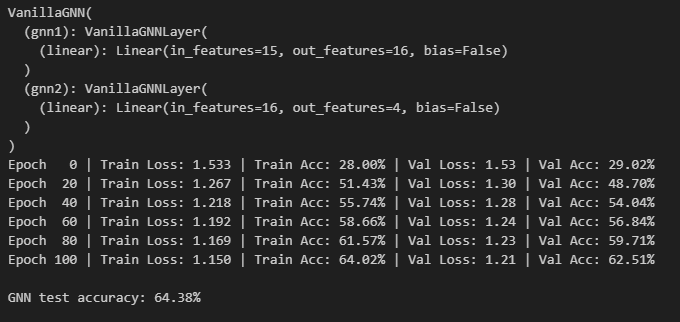

# GNN Hyperparameter Tuning
 

In [ ]:
def train_and_evaluate_gnn(learning_rate, hidden_units, epochs, adjacency, data, train_mask, val_mask, test_mask):
    # Adjust the model's parameters
    gnn.gnn1.linear = Linear(data.num_features, hidden_units, bias=False)
    gnn.gnn2.linear = Linear(hidden_units, int(data.y.max()) + 1, bias=False)

    # Define the optimizer with the given learning rate
    optimizer = torch.optim.Adam(gnn.parameters(), lr=learning_rate, weight_decay=5e-4)

    # Training loop
    criterion = torch.nn.CrossEntropyLoss()
    gnn.train()
    for epoch in range(epochs):
        optimizer.zero_grad()
        out = gnn(data.x, adjacency)
        loss = criterion(out[data.train_mask], data.y[data.train_mask])
        loss.backward()
        optimizer.step()

    # Evaluate on test set
    gnn.eval()
    out = gnn(data.x, adjacency)
    acc = accuracy(out.argmax(dim=1)[test_mask], data.y[test_mask])
    return acc

# Grid search parameters
learning_rates = [0.01, 0.005, 0.001]
hidden_units_options = [16, 32, 64]
epochs_options = [100, 150, 200]

# Variables to store the best model's performance
best_accuracy = 0.0
best_lr = 0
best_hu = 0
best_epoch = 0

for lr in learning_rates:
    for hu in hidden_units_options:
        for ep in epochs_options:
            acc = train_and_evaluate_gnn(lr, hu, ep, adjacency, data1, data1.train_mask, data1.val_mask, data1.test_mask)
            print(f"Learning Rate: {lr}, Hidden Units: {hu}, Epochs: {ep}, Test Accuracy: {acc:.4f}")

            if acc > best_accuracy:
                best_accuracy = acc
                best_lr = lr
                best_hu = hu


print(f"\nBest Model - Learning Rate: {best_lr}, Hidden Units: {best_hu}, Test Accuracy: {best_accuracy:.4f}")

# Result
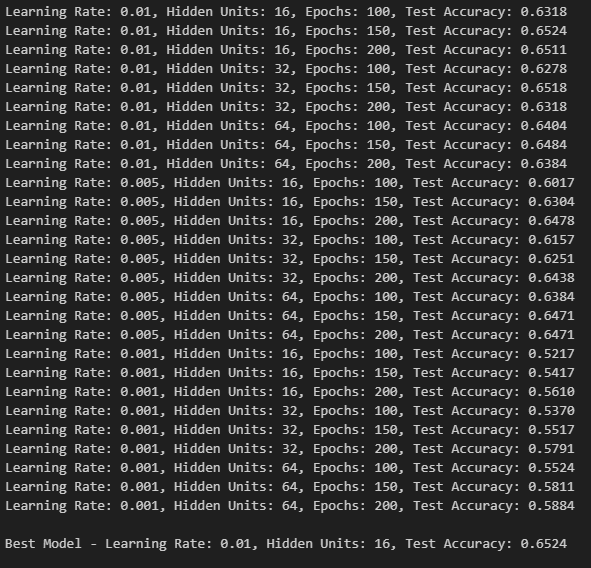


# GCN

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

# Assuming 'data1' is already defined with x, edge_index, and y

# Ensure edge_index is within the range of num_nodes
max_node_index = data1.num_nodes - 1
mask = (data1.edge_index[0] <= max_node_index) & (data1.edge_index[1] <= max_node_index)
data1.edge_index = data1.edge_index[:, mask]

# Create train, validation, and test masks
num_nodes = data1.num_nodes
indices = torch.randperm(num_nodes)

train_size = int(num_nodes * 0.8)
val_size = int(num_nodes * 0.1)

train_mask = torch.zeros(num_nodes, dtype=torch.bool)
val_mask = torch.zeros(num_nodes, dtype=torch.bool)
test_mask = torch.zeros(num_nodes, dtype=torch.bool)

train_mask[indices[:train_size]] = True
val_mask[indices[train_size:train_size + val_size]] = True
test_mask[indices[train_size + val_size:]] = True

data1.train_mask = train_mask
data1.val_mask = val_mask
data1.test_mask = test_mask

# Define accuracy function
def accuracy(pred_y, y):
    return ((pred_y == y).sum() / len(y)).item()

# Define GCN model
class GCN(torch.nn.Module):
    """Graph Convolutional Network"""
    def __init__(self, dim_in, dim_h, dim_out):
        super().__init__()
        self.gcn1 = GCNConv(dim_in, dim_h)
        self.gcn2 = GCNConv(dim_h, dim_out)

    def forward(self, x, edge_index):
        h = self.gcn1(x, edge_index)
        h = torch.relu(h)
        h = self.gcn2(h, edge_index)
        return F.log_softmax(h, dim=1)

    def fit(self, data, epochs):
        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=0.01, weight_decay=5e-4)
        self.train()
        for epoch in range(epochs+1):
            optimizer.zero_grad()
            out = self(data.x, data.edge_index)
            loss = criterion(out[data.train_mask], data.y[data.train_mask])
            acc = accuracy(out[data.train_mask].argmax(dim=1), data.y[data.train_mask])
            loss.backward()
            optimizer.step()
            if(epoch % 20 == 0):
                val_loss = criterion(out[data.val_mask], data.y[data.val_mask])
                val_acc = accuracy(out[data.val_mask].argmax(dim=1), data.y[data.val_mask])
                print(f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc: {acc*100:>5.2f}% | Val Loss: {val_loss:.2f} | Val Acc: {val_acc*100:.2f}%')

    @torch.no_grad()
    def test(self, data):
        self.eval()
        out = self(data.x, data.edge_index)
        predictions = out.argmax(dim=1)
        acc = accuracy(predictions[data.test_mask], data.y[data.test_mask])
        return acc, predictions

# Initialize and train the GCN model
num_features = data1.num_features
num_classes = int(data1.y.max()) + 1
gcn = GCN(num_features, 16, num_classes)
print(gcn)
gcn.fit(data1, epochs=100)

# Test the model
acc, pred = gcn.test(data1)
print(f'GCN test accuracy: {acc*100:.2f}%')


# Result 
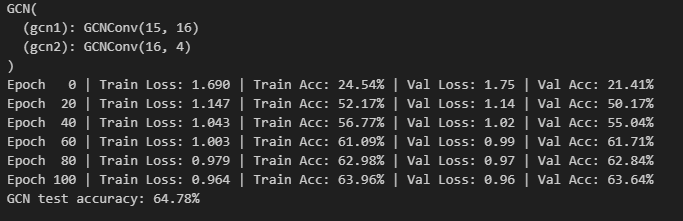

# GCN Hyperparameter Tuning


In [ ]:
def train_and_evaluate_gcn(learning_rate, hidden_units, epoch_count, data, train_mask, val_mask, test_mask):
    # Adjust the model's parameters
    gcn.gcn1 = GCNConv(data.num_features, hidden_units)
    gcn.gcn2 = GCNConv(hidden_units, int(data.y.max()) + 1)

    # Define the optimizer with the given learning rate
    optimizer = torch.optim.Adam(gcn.parameters(), lr=learning_rate, weight_decay=5e-4)

    # Training loop
    criterion = torch.nn.CrossEntropyLoss()
    gcn.train()
    for epoch in range(epoch_count):
        optimizer.zero_grad()
        out = gcn(data.x, data.edge_index)
        loss = criterion(out[data.train_mask], data.y[data.train_mask])
        loss.backward()
        optimizer.step()

    # Evaluate on test set
    gcn.eval()
    out = gcn(data.x, data.edge_index)
    acc = accuracy(out.argmax(dim=1)[test_mask], data.y[test_mask])
    return acc

# Grid search parameters
learning_rates = [0.01, 0.005, 0.001]
hidden_units_options = [16, 32, 64]
epochs_options = [100, 150, 200]

# Variables to store the best model's performance
best_accuracy = 0.0
best_lr = 0
best_hu = 0
best_epoch = 0

for lr in learning_rates:
    for hu in hidden_units_options:
        for ep in epochs_options:
            acc = train_and_evaluate_gcn(lr, hu, ep, data1, data1.train_mask, data1.val_mask, data1.test_mask)
            print(f"Learning Rate: {lr}, Hidden Units: {hu}, Epochs: {ep}, Test Accuracy: {acc:.4f}")

            if acc > best_accuracy:
                best_accuracy = acc
                best_lr = lr
                best_hu = hu
                best_epoch = ep

print(f"\nBest Model - Learning Rate: {best_lr}, Hidden Units: {best_hu}, Epochs: {best_epoch}, Test Accuracy: {best_accuracy:.4f}")

# Result
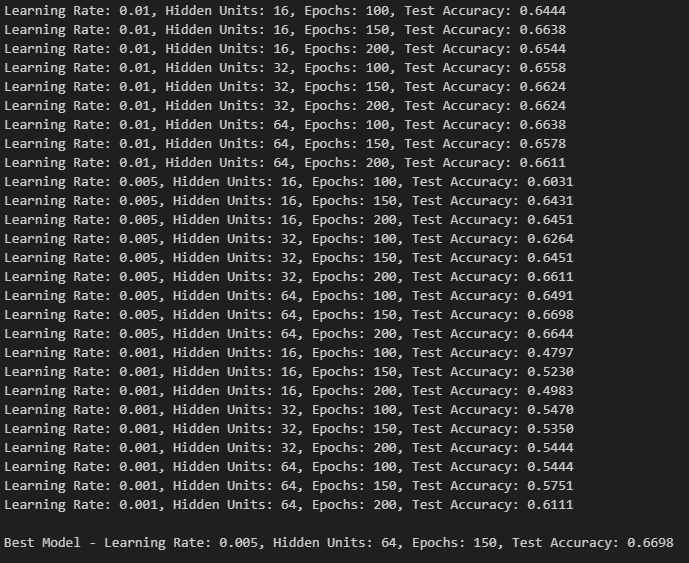

# GAT 

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GATv2Conv

# Assuming 'data1' is already defined with x, edge_index, and y

# Create train, validation, and test masks
num_nodes = data1.num_nodes
indices = torch.randperm(num_nodes)

train_size = int(num_nodes * 0.8)
val_size = int(num_nodes * 0.1)

train_mask = torch.zeros(num_nodes, dtype=torch.bool)
val_mask = torch.zeros(num_nodes, dtype=torch.bool)
test_mask = torch.zeros(num_nodes, dtype=torch.bool)

train_mask[indices[:train_size]] = True
val_mask[indices[train_size:train_size + val_size]] = True
test_mask[indices[train_size + val_size:]] = True

data1.train_mask = train_mask
data1.val_mask = val_mask
data1.test_mask = test_mask

def accuracy(y_pred, y_true):
    return torch.sum(y_pred == y_true) / len(y_true)

class GAT(torch.nn.Module):
    def __init__(self, dim_in, dim_h, dim_out, heads=8):
        super().__init__()
        self.gat1 = GATv2Conv(dim_in, dim_h, heads=heads)
        self.gat2 = GATv2Conv(dim_h * heads, dim_out, heads=1)

    def forward(self, x, edge_index):
        h = F.dropout(x, p=0.6, training=self.training)
        h = self.gat1(h, edge_index)
        h = F.elu(h)
        h = F.dropout(h, p=0.6, training=self.training)
        h = self.gat2(h, edge_index)
        return F.log_softmax(h, dim=1)

    def fit(self, data, epochs):
        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=0.01, weight_decay=5e-4)
        self.train()
        for epoch in range(epochs+1):
            optimizer.zero_grad()
            out = self(data.x, data.edge_index)
            loss = criterion(out[data.train_mask], data.y[data.train_mask])
            acc = accuracy(out[data.train_mask].argmax(dim=1), data.y[data.train_mask])
            loss.backward()
            optimizer.step()
            if epoch % 20 == 0:
                val_loss = criterion(out[data.val_mask], data.y[data.val_mask])
                val_acc = accuracy(out[data.val_mask].argmax(dim=1), data.y[data.val_mask])
                print(f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc: {acc*100:>5.2f}% | Val Loss: {val_loss:.2f} | Val Acc: {val_acc*100:.2f}%')

    @torch.no_grad()
    def test(self, data):
        self.eval()
        out = self(data.x, data.edge_index)
        acc = accuracy(out.argmax(dim=1)[data.test_mask], data.y[data.test_mask])
        return acc

num_features = data1.num_features
num_classes = int(data1.y.max()) + 1
gat = GAT(num_features, 32, num_classes)
gat.fit(data1, epochs=100)

acc = gat.test(data1)
print(f'GAT test accuracy: {acc*100:.2f}%')


# Result
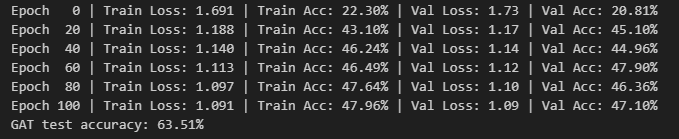

# GAT Hyperparameter Tuning

In [ ]:
def train_and_evaluate_gat(learning_rate, hidden_units, epochs, data, train_mask, val_mask, test_mask, heads=8):
    # Adjust the model's parameters
    gat.gat1 = GATv2Conv(data.num_features, hidden_units, heads=heads)
    gat.gat2 = GATv2Conv(hidden_units * heads, int(data.y.max()) + 1, heads=1)

    # Define the optimizer with the given learning rate
    optimizer = torch.optim.Adam(gat.parameters(), lr=learning_rate, weight_decay=5e-4)

    # Training loop
    criterion = torch.nn.CrossEntropyLoss()
    gat.train()
    for epoch in range(epochs):
        optimizer.zero_grad()
        out = gat(data.x, data.edge_index)
        loss = criterion(out[data.train_mask], data.y[data.train_mask])
        loss.backward()
        optimizer.step()

    # Evaluate on test set
    gat.eval()
    out = gat(data.x, data.edge_index)
    acc = accuracy(out.argmax(dim=1)[test_mask], data.y[test_mask])
    return acc

# Grid search parameters
learning_rates = [0.01, 0.005, 0.001]
hidden_units_options = [16, 32, 64]
epochs_options = [100, 150, 200]

# Variables to store the best model's performance
best_accuracy = 0.0
best_lr = 0
best_hu = 0
best_epoch = 0

for lr in learning_rates:
    for hu in hidden_units_options:
        for ep in epochs_options:
            acc = train_and_evaluate_gat(lr, hu, ep, data1, data1.train_mask, data1.val_mask, data1.test_mask)
            print(f"Learning Rate: {lr}, Hidden Units: {hu}, Epochs: {ep}, Test Accuracy: {acc:.4f}")

            if acc > best_accuracy:
                best_accuracy = acc
                best_lr = lr
                best_hu = hu
                best_epoch = ep

print(f"\nBest Model - Learning Rate: {best_lr}, Hidden Units: {best_hu}, Epochs: {best_epoch}, Test Accuracy: {best_accuracy:.4f}")

# Result 
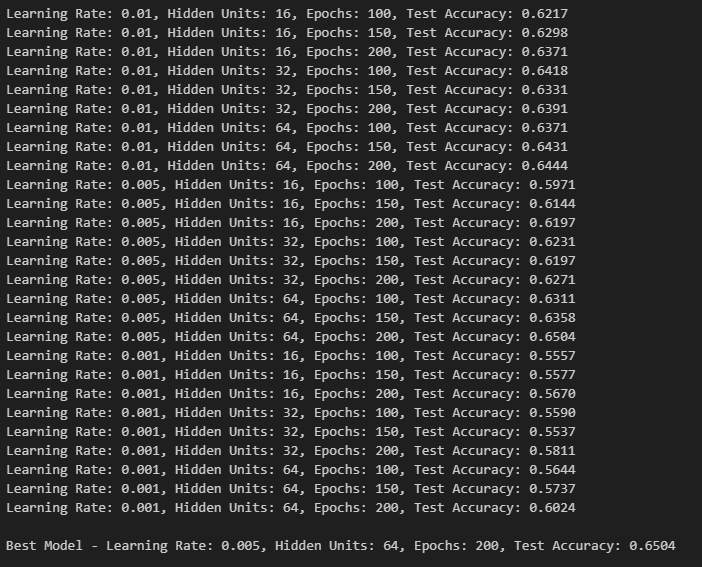